In [1]:
import inception5h
import math
import os
from os import listdir
import tensorflow as tf
import utils
import PIL.Image

from image_processing import process_and_save_img, process_and_save_img_in_depth, blend_images
from IPython.core.display import HTML
from IPython.display import display

/Users/stefantippelt/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# download deep dream model if it does not yet exist locally
inception5h.maybe_download()

# load model
model = inception5h.Inception5h()
print('{} model loaded'.format(model))

# create TensorFlow session
session = tf.InteractiveSession(graph=model.graph)
print('tensorflow session created: {}'.format(session))

Data has apparently already been downloaded and unpacked.
<inception5h.Inception5h object at 0x12108b7b8> model loaded
tensorflow session created: <tensorflow.python.client.session.InteractiveSession object at 0x1210940b8>


In [3]:
# TODO: show some informative output
# Check which layers are available in the model


# model.layer_tensors
# op = session.graph.get_operations()
# [m.values() for m in op]

# model.layer_names

In [4]:
ls img/urban

docker.jpg   docker3.jpg  urban17.jpg  urban20.jpg  urban23.jpg  urban26.jpg
docker1.jpg  urban15.jpg  urban18.jpg  urban21.jpg  urban24.jpg  urban27.jpg
docker2.jpg  urban16.jpg  urban19.jpg  urban22.jpg  urban25.jpg


In [19]:
# available categories

categories = {1: 'cats',
              2: 'urban',
              3: 'landscape',
              4: 'people',
              5:'slides'}

category = categories[5]

# set up paths where to pick up images from
# full_path = os.path.join(os.getcwd(), category)
full_path = os.path.join(os.getcwd(),'img', category)
files = os.listdir(full_path)
print(files)

['.DS_Store', 'slide2.jpg']


In [20]:
# reference picture you are interested in
filename = files[1]

filename_path = os.path.join(full_path, filename)

# load input image from folder
image = utils.load_image(filename=filename_path)
print('The image that will be processed:', filename_path)

utils.plot_image(image)

The image that will be processed: /Users/stefantippelt/deep-dream-viz/src/img/slides/slide2.jpg


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [21]:
# create path where to store output images
output_path = full_path + '_output_' + os.path.splitext(filename)[0]
print('The resulting images are stored to the folder:', output_path)

The resulting images are stored to the folder: /Users/stefantippelt/deep-dream-viz/src/img/slides_output_slide2


In [22]:
%%time
img_dict = process_and_save_img(input_name=filename, category=category, output_path=output_path, image=image, model=model,
                         session=session, num_repeats=3.0, rescale_factor=0.7,
                         step_size=3.0, speedup=True)
    

# img_dict = process_and_save_img(input_name=filename, category=category, output_path=output_path, image=image, 
#                      model=model, session=session, speedup=True)

KeyboardInterrupt: 

In [11]:
HTML("""
<style>
* {
    box-sizing: border-box;
}

body {
    margin: 0;
    font-family: Arial;
}

.header {
    text-align: center;
    padding: 32px;
}

/* Create four equal columns that floats next to each other */
.column {
    float: left;
    width: 25%;
    padding: 10px;
}

.column img {
    margin-top: 12px;
}

/* Clear floats after the columns */
.row:after {
    content: "";
    display: table;
    clear: both;
}

/* Responsive layout - makes a two column-layout instead of four columns */
@media (max-width: 800px) {
    .column {
        width: 50%;
    }
}

/* Responsive layout - makes the two columns stack on top of each other instead of next to each other */
@media (max-width: 600px) {
    .column {
        width: 100%;
    }
}
</style>
""")

In [20]:
# define output file
output_file = category + '_output_' + os.path.splitext(filename)[0] + '/'

# define list for images with different blend parameters
images0 = []
images2 = []
images4 = []
images6 = []

# get all images in directory
for image in img_dict.keys():
# for image in listdir(os.path.join('img', output_file)):
    # store names of images with different blend parameters in subfolders
    blend0 = []
    blend2 = []
    blend4 = []
    blend6 = []
    
    # iterate through image dict and append to proper blend file
    for key, value in img_dict.items():
        if value['blend'] == 0.0:
            blend0.append(value['filename'])
        if value['blend'] == 0.2:
            blend2.append(value['filename'])
        if value['blend'] == 0.4:
            blend4.append(value['filename'])
        if value['blend'] == 0.6:
            blend6.append(value['filename'])

# create HTML output for the single blend parameters as separate columns
for image in blend0:
    img0 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images0.append(img0)

for image in blend2:
    img2 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images2.append(img2)

for image in blend4:
    img4 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images4.append(img4)

for image in blend6:
    img6 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images6.append(img6)

In [21]:
# create HTML and pass images
HTML("""
<div class="row"> 
  <div class="column">
    {images0}
  </div>
  <div class="column">
    {images2}
  </div>
    <div class="column">
    {images4}
  </div>
    <div class="column">
    {images6} 
  </div>
</div>
""".format(images0="\n".join(images0), 
           images2="\n".join(images2), 
           images4="\n".join(images4), 
           images6="\n".join(images6)))

In [32]:
ls img/urban/docker1.png

__pycache__/                    img/
deep_dream_visualization.ipynb  inception/
download.py                     inception5h.py
image_optimize.py               logfile.log
image_processing.py             utils.py


In [ ]:
#  TODO make all images properly accessible and also their specifications

print('all output images:')
for image in listdir(os.path.join('img', output_file)):
    print(image)

index = 1
print('selected image: ', listdir(os.path.join('img', output_file))[index])

image_to_process = listdir(os.path.join('img', output_file))[index]

# image_to_process /opt/deepdream/src/img/urban/urban1.jpg
full_path = os.path.join(os.getcwd(),'img', output_file)

In [9]:
# inject specific image
full_path = '/Users/stefantippelt/deep-dream-viz/src/'
image_to_process = 'img/urban/docker3.jpg'

In [10]:
print(full_path)

/Users/stefantippelt/deep-dream-viz/src/


In [11]:
# files = os.listdir(full_path)
filename_path = os.path.join(full_path, image_to_process)

image = utils.load_image(filename=filename_path)
print('The image that will be processed:', filename_path)

utils.plot_image(image)

The image that will be processed: /Users/stefantippelt/deep-dream-viz/src/img/urban/docker3.jpg


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [12]:
# TODO get specifications of nice images and make model to only run optimizations on that one

In [13]:
# process_and_save_img(input_name, category, output_path, image, model, session, speedup=True, step_size=3.0)

In [14]:
# process_and_save_img_in_depth(input_name=filename, indepth_layer='conv2d2', category=category,
#                               output_path=output_path, image=image, model=model, session=session,
#                                   num_iterations=3, rescale_factor=0.7, num_repeats=3, speedup=True)

In [15]:
model.layer_names

['conv2d0',
 'conv2d1',
 'conv2d2',
 'mixed3a',
 'mixed3b',
 'mixed4a',
 'mixed4b',
 'mixed4c',
 'mixed4d',
 'mixed4e',
 'mixed5a',
 'mixed5b']

In [17]:
# process_and_save_img(input_name=filename, category=category, output_path=output_path, image=image, model=model,
#                          session=session, num_repeats=3.0, rescale_factor=0.7,
#                          step_size=3.0, speedup=True)
    
    
img_in_depth_dict = process_and_save_img_in_depth(input_name=filename, indepth_layer='conv2d1', category=category,
                              output_path=output_path, image=image, model=model, session=session,
                                  num_iterations=8, rescale_factor=0.7, num_repeats=5)

--- Logging error ---
Traceback (most recent call last):
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.l

--- Logging error ---
Traceback (most recent call last):
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.l

--- Logging error ---
Traceback (most recent call last):
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.l

--- Logging error ---
Traceback (most recent call last):
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.l

--- Logging error ---
Traceback (most recent call last):
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.l

--- Logging error ---
Traceback (most recent call last):
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.l

--- Logging error ---
Traceback (most recent call last):
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/Users/stefantippelt/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/stefantippelt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.l

In [17]:
# TODO check why that works, does it?
# define output file
output_file = category + '_output_' + os.path.splitext(filename)[0] + '/'

# define list for images with different step size parameters
images0 = []
images2 = []
images4 = []
images6 = []
# get all images in directory from dict
for image in img_in_depth_dict.keys():
    print(image)
    # store names of images with different blend parameters in subfolders
    blend0 = []
    blend2 = []
    blend4 = []
    blend6 = []

    # iterate through image dict and append to proper blend file
    for key, value in img_in_depth_dict.items():
        if value['blend'] == 0.0:
            blend0.append(value['filename'])
        if value['blend'] == 0.2:
            blend2.append(value['filename'])
        if value['blend'] == 0.4:
            blend4.append(value['filename'])
        if value['blend'] == 0.6:
            blend6.append(value['filename'])
# create HTML output for the single blend parameters as separate columns
for image in blend0:
    img0 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images0.append(img0)

for image in blend2:
    img2 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images2.append(img2)

for image in blend4:
    img4 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images4.append(img4)

for image in blend6:
    img6 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images6.append(img6)

In [21]:
# create HTML and pass images
HTML("""
<div class="row"> 
  <div class="column">
    {images0}
  </div>
  <div class="column">
    {images2}
  </div>
    <div class="column">
    {images4}
  </div>
    <div class="column">
    {images6} 
  </div>
</div>
""".format(images0="\n".join(images0), 
           images2="\n".join(images2), 
           images4="\n".join(images4), 
           images6="\n".join(images6)))

In [22]:
ls

__pycache__/                    img/
deep_dream_visualization.ipynb  inception/
download.py                     inception5h.py
image_optimize.py               utils.py
image_processing.py


In [41]:
ls img/streetart/

streetart1.jpg  streetart2.jpg  streetart3.jpg


In [30]:
from PIL import Image
im = Image.open('img/streetart/streetart1.jpg')
width, height = im.size

In [31]:
width

1280

In [52]:
def resize_secondary_image(primary_image, secondary_image):
    """
    Brings the secondary image to the same size as the primary image.
    """
    im_primary = Image.open(primary_image)
    im_secondary = Image.open(secondary_image)
    
    width_primary, height_primary = im_primary.size
    
    resized_secondary_image = im_secondary.resize((width_primary, height_primary), resample=0)
    
    return resized_secondary_image


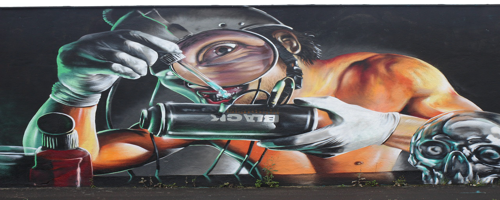

In [53]:
from PIL import Image
im.resize((500, 200), resample=3)

In [18]:
# def resize_secondary_image(primary_image, secondary_image):
#     """
#     Brings the secondary image to the same size as the primary image.
#     """
#     im_primary = Image.open(primary_image)
#     im_secondary = Image.open(secondary_image)

#     width_primary, height_primary = im_primary.size
#     # TODO: add smarter way to do that, take look at resize and crop
#     resized_secondary_image = im_secondary.resize((width_primary, height_primary),
#                                                   resample=0)
#     return resized_secondary_image

In [19]:
# def blend_images(primary_image, secondary_image, alpha):
#     """
#     Blends two images together after resizing the secondary one to the size of
#     the primary one.
#     """
#     # TODO: remove colors of blended image
#     im_primary = Image.open(primary_image)
#     # im_secondary = Image.open(secondary_image)

#     resized_secondary_image = resize_secondary_image(primary_image, secondary_image)
#     blended_image = Image.blend(im_primary, resized_secondary_image, alpha)

#     return blended_image

In [4]:
ls img/streetart/

cool.png        fashion1.jpg    streetart1.jpg  streetart2.jpg  streetart3.jpg


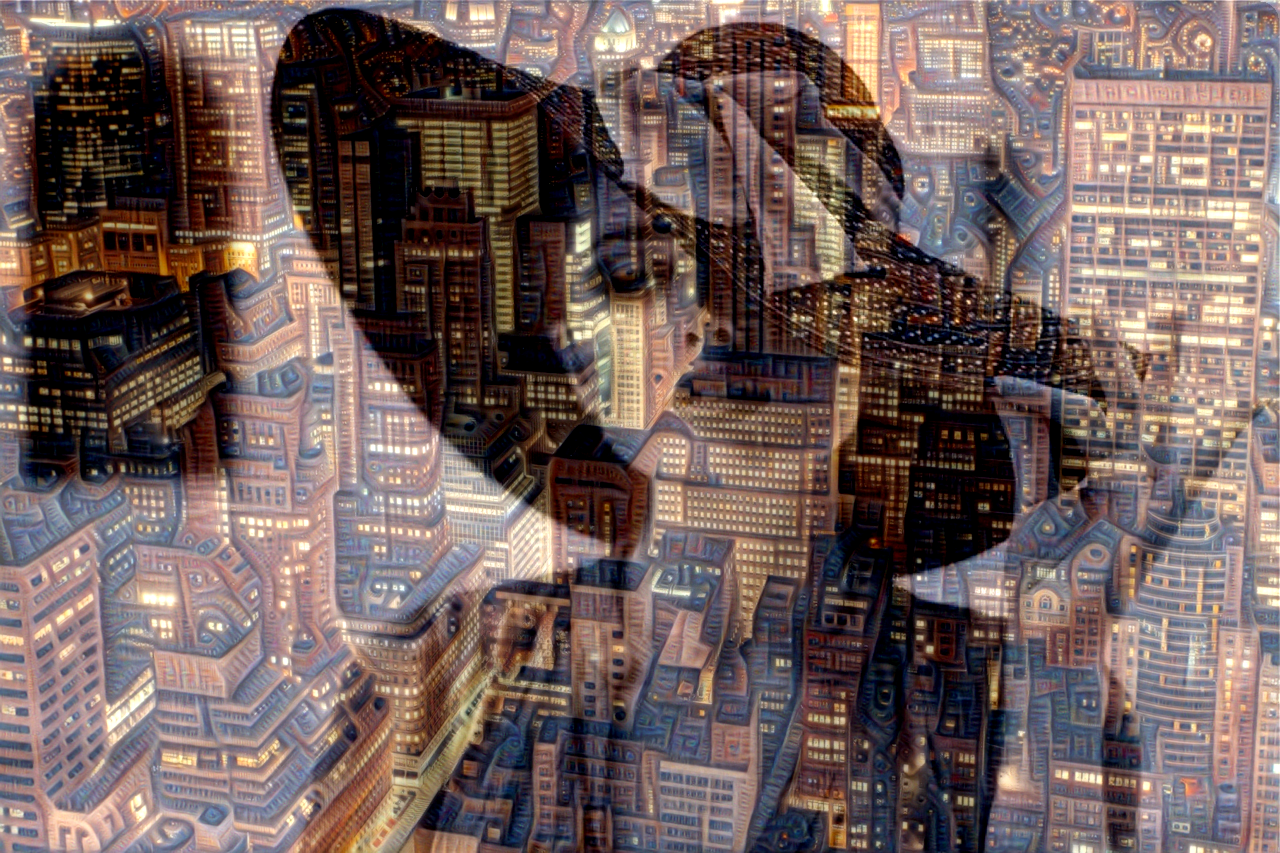

In [5]:
blend_images(primary_image='img/streetart/cool.png', secondary_image='img/streetart/fashion1.jpg', alpha=0.4, 
             saturation_enhance=10, contrast_enhance=1.6)

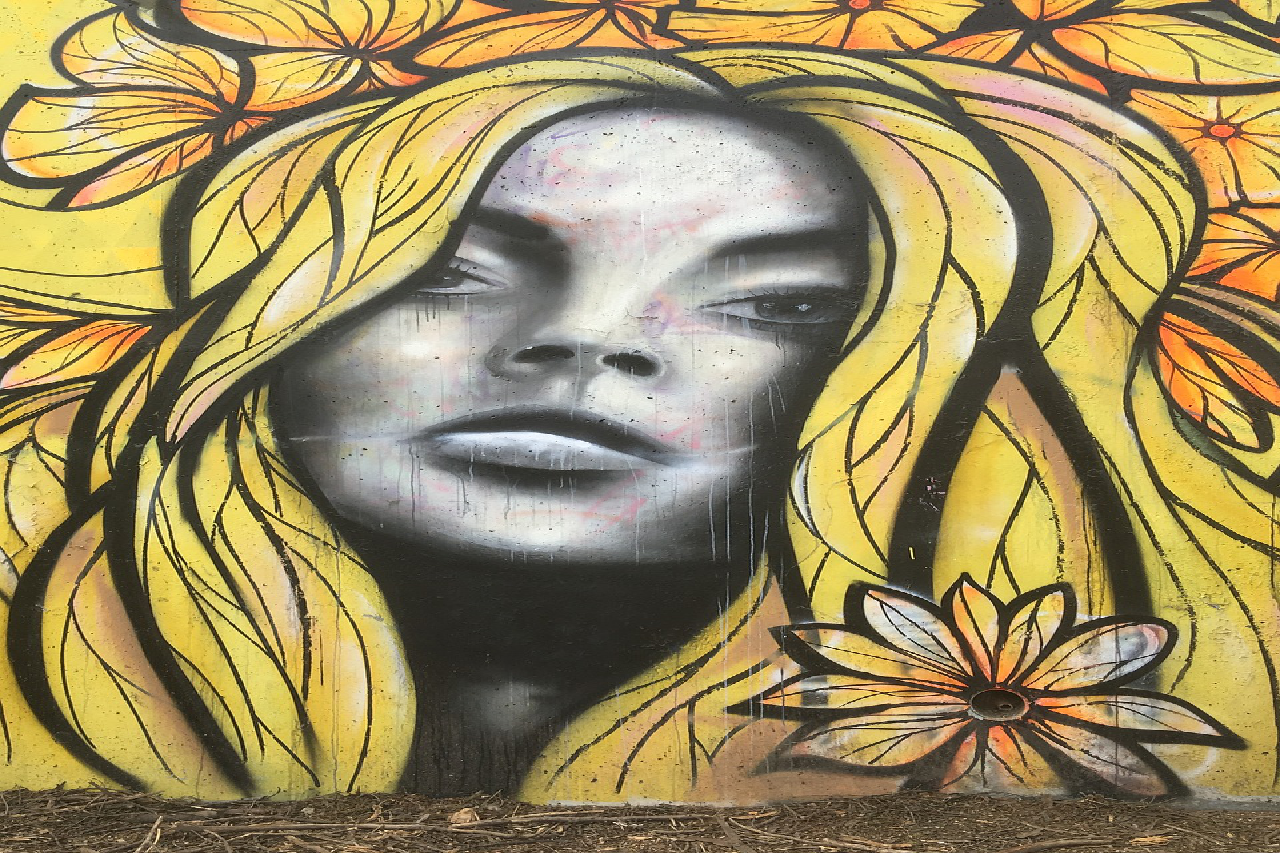

In [11]:
from PIL import Image
resize_secondary_image(primary_image='img/streetart/streetart1.jpg', secondary_image='img/streetart/streetart2.jpg')

In [2]:
blend_images(primary_image='img/streetart/streetart1.jpg', secondary_image='img/streetart/streetart2.jpg', alpha=0.5)

TypeError: blend_images() missing 2 required positional arguments: 'saturation_enhance' and 'contrast_enhance'

In [7]:
resize_secondary_image(primary_image='img/streetart/streetart1.jpg', secondary_image='img/streetart/streetart2.jpg')